In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/loan_data.csv")

## Basic Info

In [3]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Null Values

In [6]:
data.isnull().any()

person_age                        False
person_gender                     False
person_education                  False
person_income                     False
person_emp_exp                    False
person_home_ownership             False
loan_amnt                         False
loan_intent                       False
loan_int_rate                     False
loan_percent_income               False
cb_person_cred_hist_length        False
credit_score                      False
previous_loan_defaults_on_file    False
loan_status                       False
dtype: bool

In [7]:
data.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [8]:
cat_cols = [col for col in data.columns if data[col].nunique() < 10]
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

## Countplots

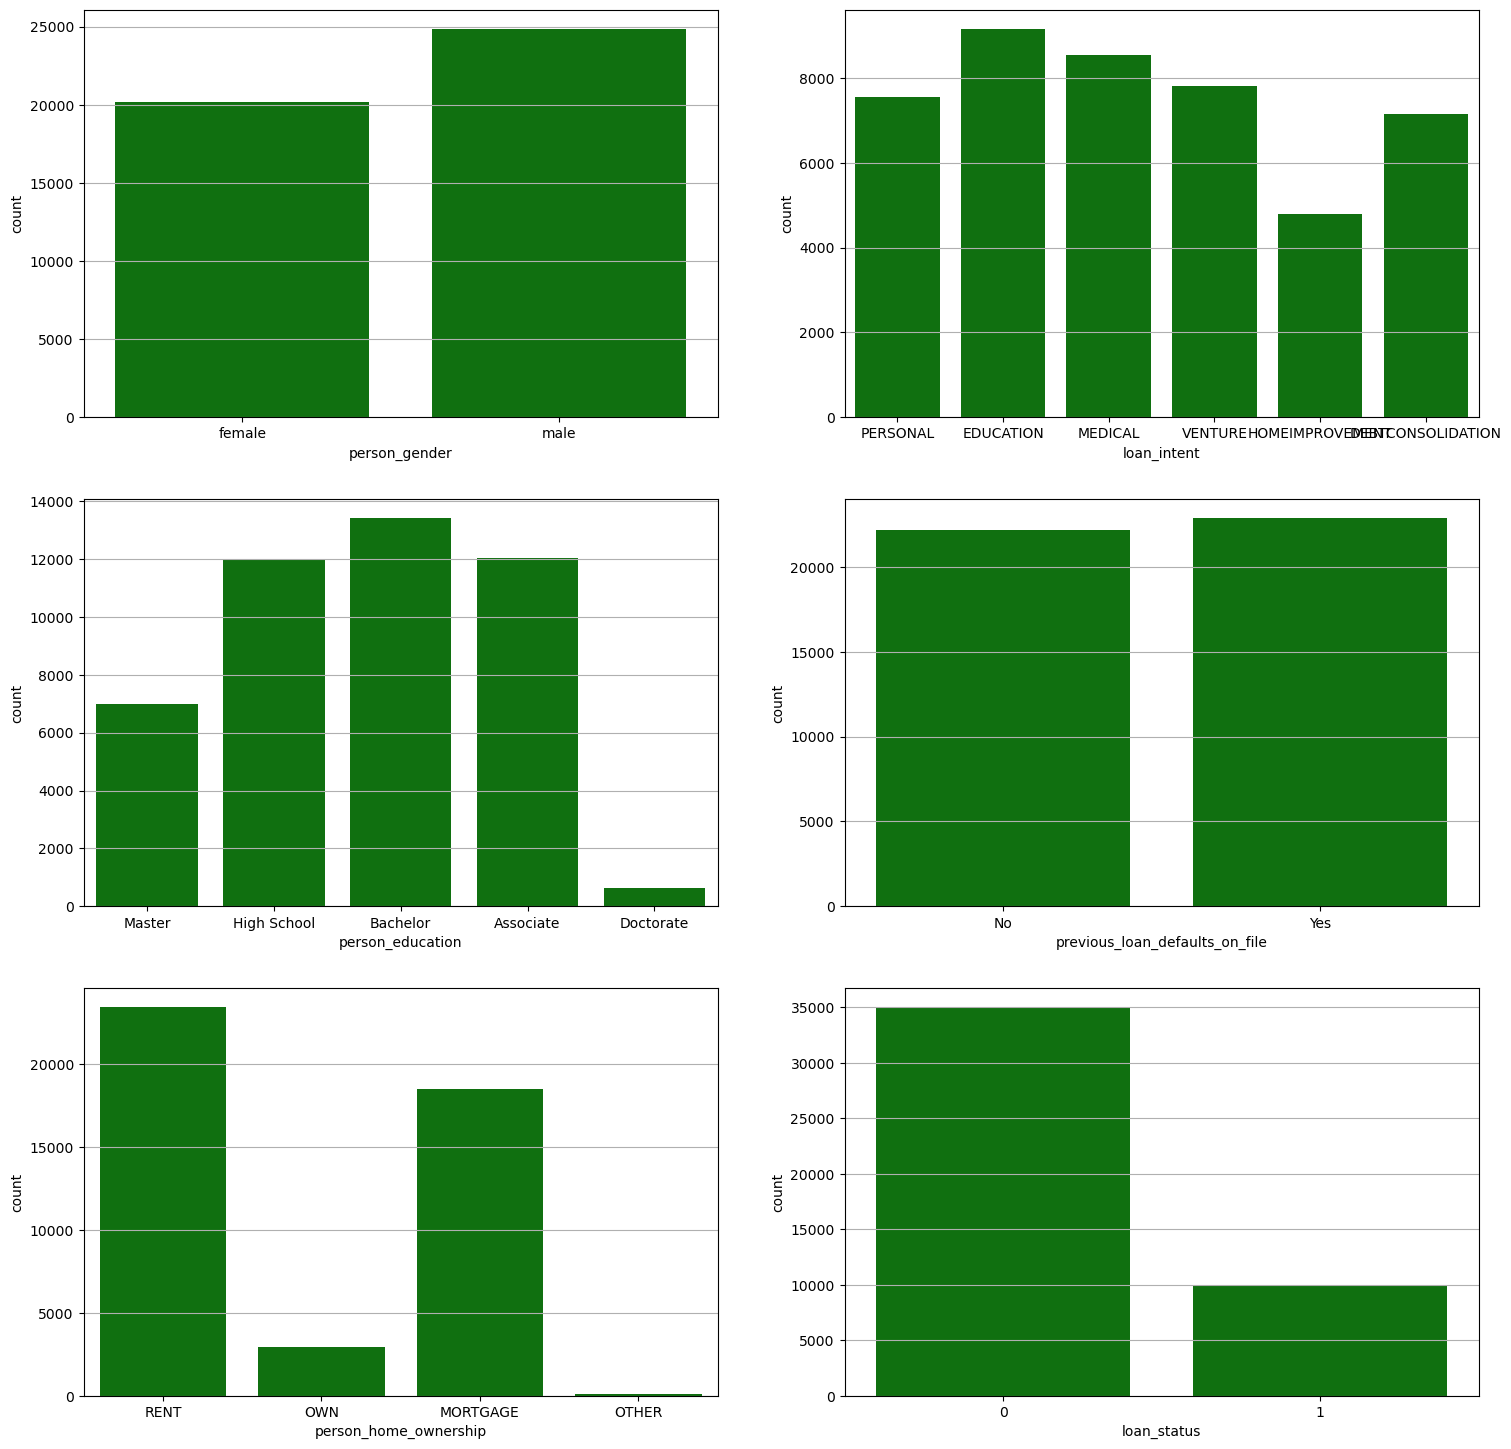

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(18,18))
for i,col in enumerate(cat_cols):
    column = i // 3
    row = i % 3
    axes[row][column].grid()
    sns.countplot(data, x=col, ax=axes[row][column], color="green")
fig.savefig("CountplotCategorical.png")

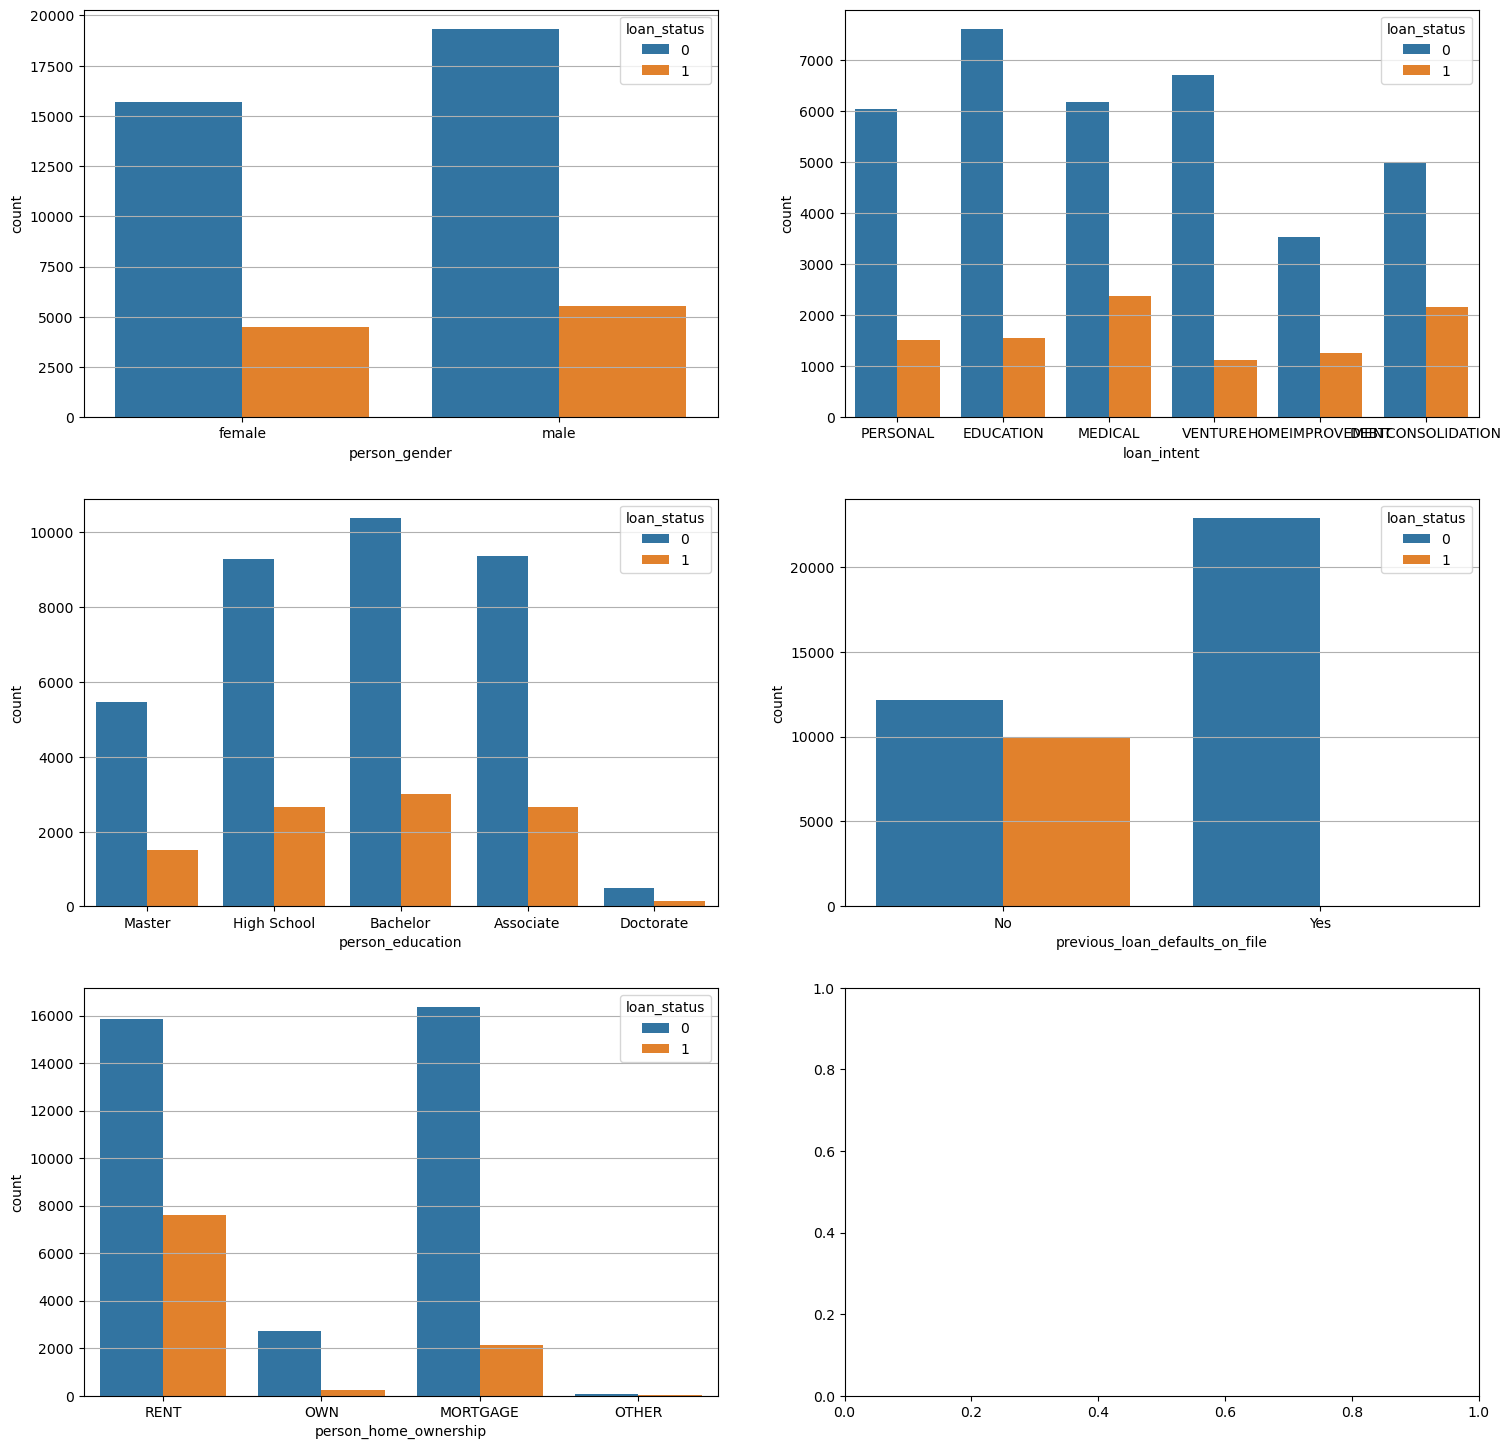

In [10]:
fig, axes = plt.subplots(figsize=(18,18), ncols=2, nrows=3)
for i,col in enumerate(cat_cols[:-1]):
    column = i // 3
    row = i % 3

    
    
    axes[row][column].grid()
    sns.countplot(data, x=col, hue="loan_status", ax=axes[row][column])

fig.savefig("CountplotWithHue.png")

## Approval Percentages

In [11]:
def find_percentage(column, approved=True):
    total = data.shape[0]
    total_value_count = data[column].value_counts()
    approved_value_count = data.loc[data['loan_status']==1,column].value_counts()
    
    labels = list(total_value_count.index)
    approve_percentage=[]
    decline_percentage=[]

    for label in labels:
        total = total_value_count[label]
        approved_count = approved_value_count.get(label, 0)

        lbl_approve_perc = (approved_count/total) * 100
        approve_percentage.append(lbl_approve_perc)
        decline_percentage.append(100-lbl_approve_perc)

    approved_series = pd.Series(approve_percentage, index=labels, name=f"Approved Perc w.r.t {column}")
    declined_series = pd.Series(decline_percentage, index=labels, name=f"Declined Perc w.r.t {column}")
    if approved:
        return approved_series
    else:
        return declined_series
        

In [12]:
education_approve_perc = find_percentage("person_education")
education_approve_perc

Bachelor       22.524069
Associate      22.031926
High School    22.310391
Master         21.762178
Doctorate      22.866345
Name: Approved Perc w.r.t person_education, dtype: float64

In [13]:
loan_intent_approve_perc = find_percentage("loan_intent")
loan_intent_approve_perc

EDUCATION            16.956189
MEDICAL              27.819373
VENTURE              14.426397
PERSONAL             20.140360
DEBTCONSOLIDATION    30.272918
HOMEIMPROVEMENT      26.301484
Name: Approved Perc w.r.t loan_intent, dtype: float64

In [14]:
pers_home_own_approve_perc = find_percentage("person_home_ownership")
pers_home_own_approve_perc

RENT        32.397731
MORTGAGE    11.596084
OWN          7.522874
OTHER       33.333333
Name: Approved Perc w.r.t person_home_ownership, dtype: float64

In [15]:
prev_loan_onFile_approve_perc = find_percentage("previous_loan_defaults_on_file")
prev_loan_onFile_approve_perc

Yes     0.000000
No     45.163039
Name: Approved Perc w.r.t previous_loan_defaults_on_file, dtype: float64

In [16]:
gender_approve_perc = find_percentage("person_gender")
gender_approve_perc

male      22.201200
female    22.248127
Name: Approved Perc w.r.t person_gender, dtype: float64

## Correlation Heatmap

<Axes: title={'center': 'Correlation between features'}>

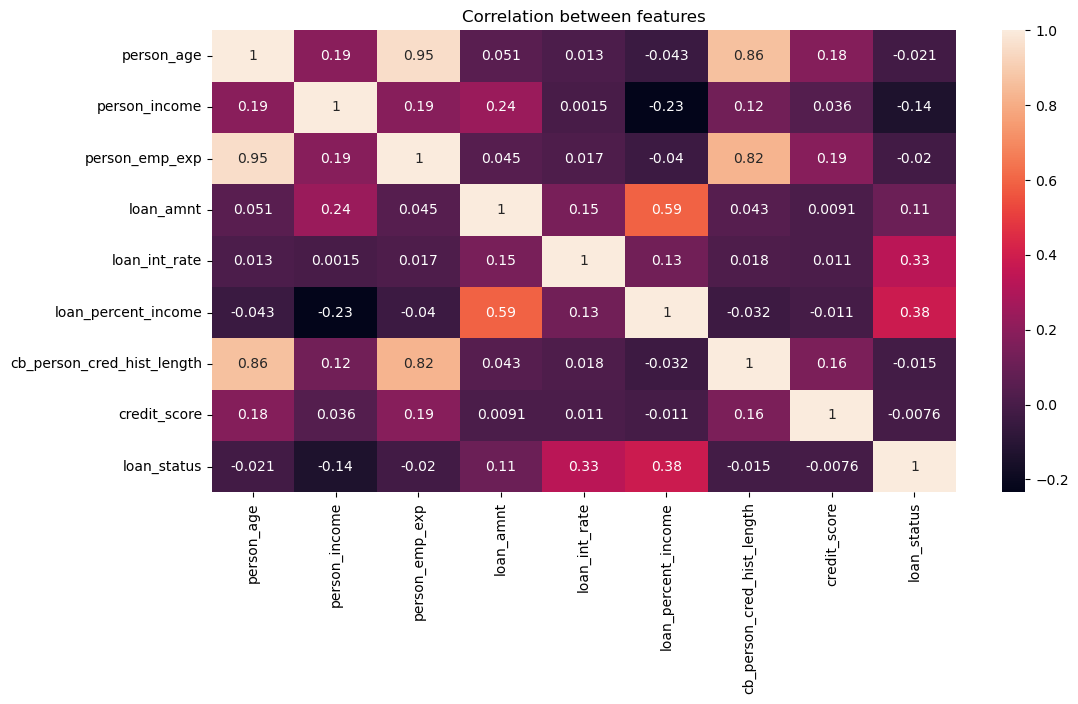

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Correlation between features")
sns.heatmap(data.corr(numeric_only=True), annot=True, ax=ax)

## Outliers

In [18]:
num_col = [col for col in data.columns if col not in cat_cols]
num_col

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

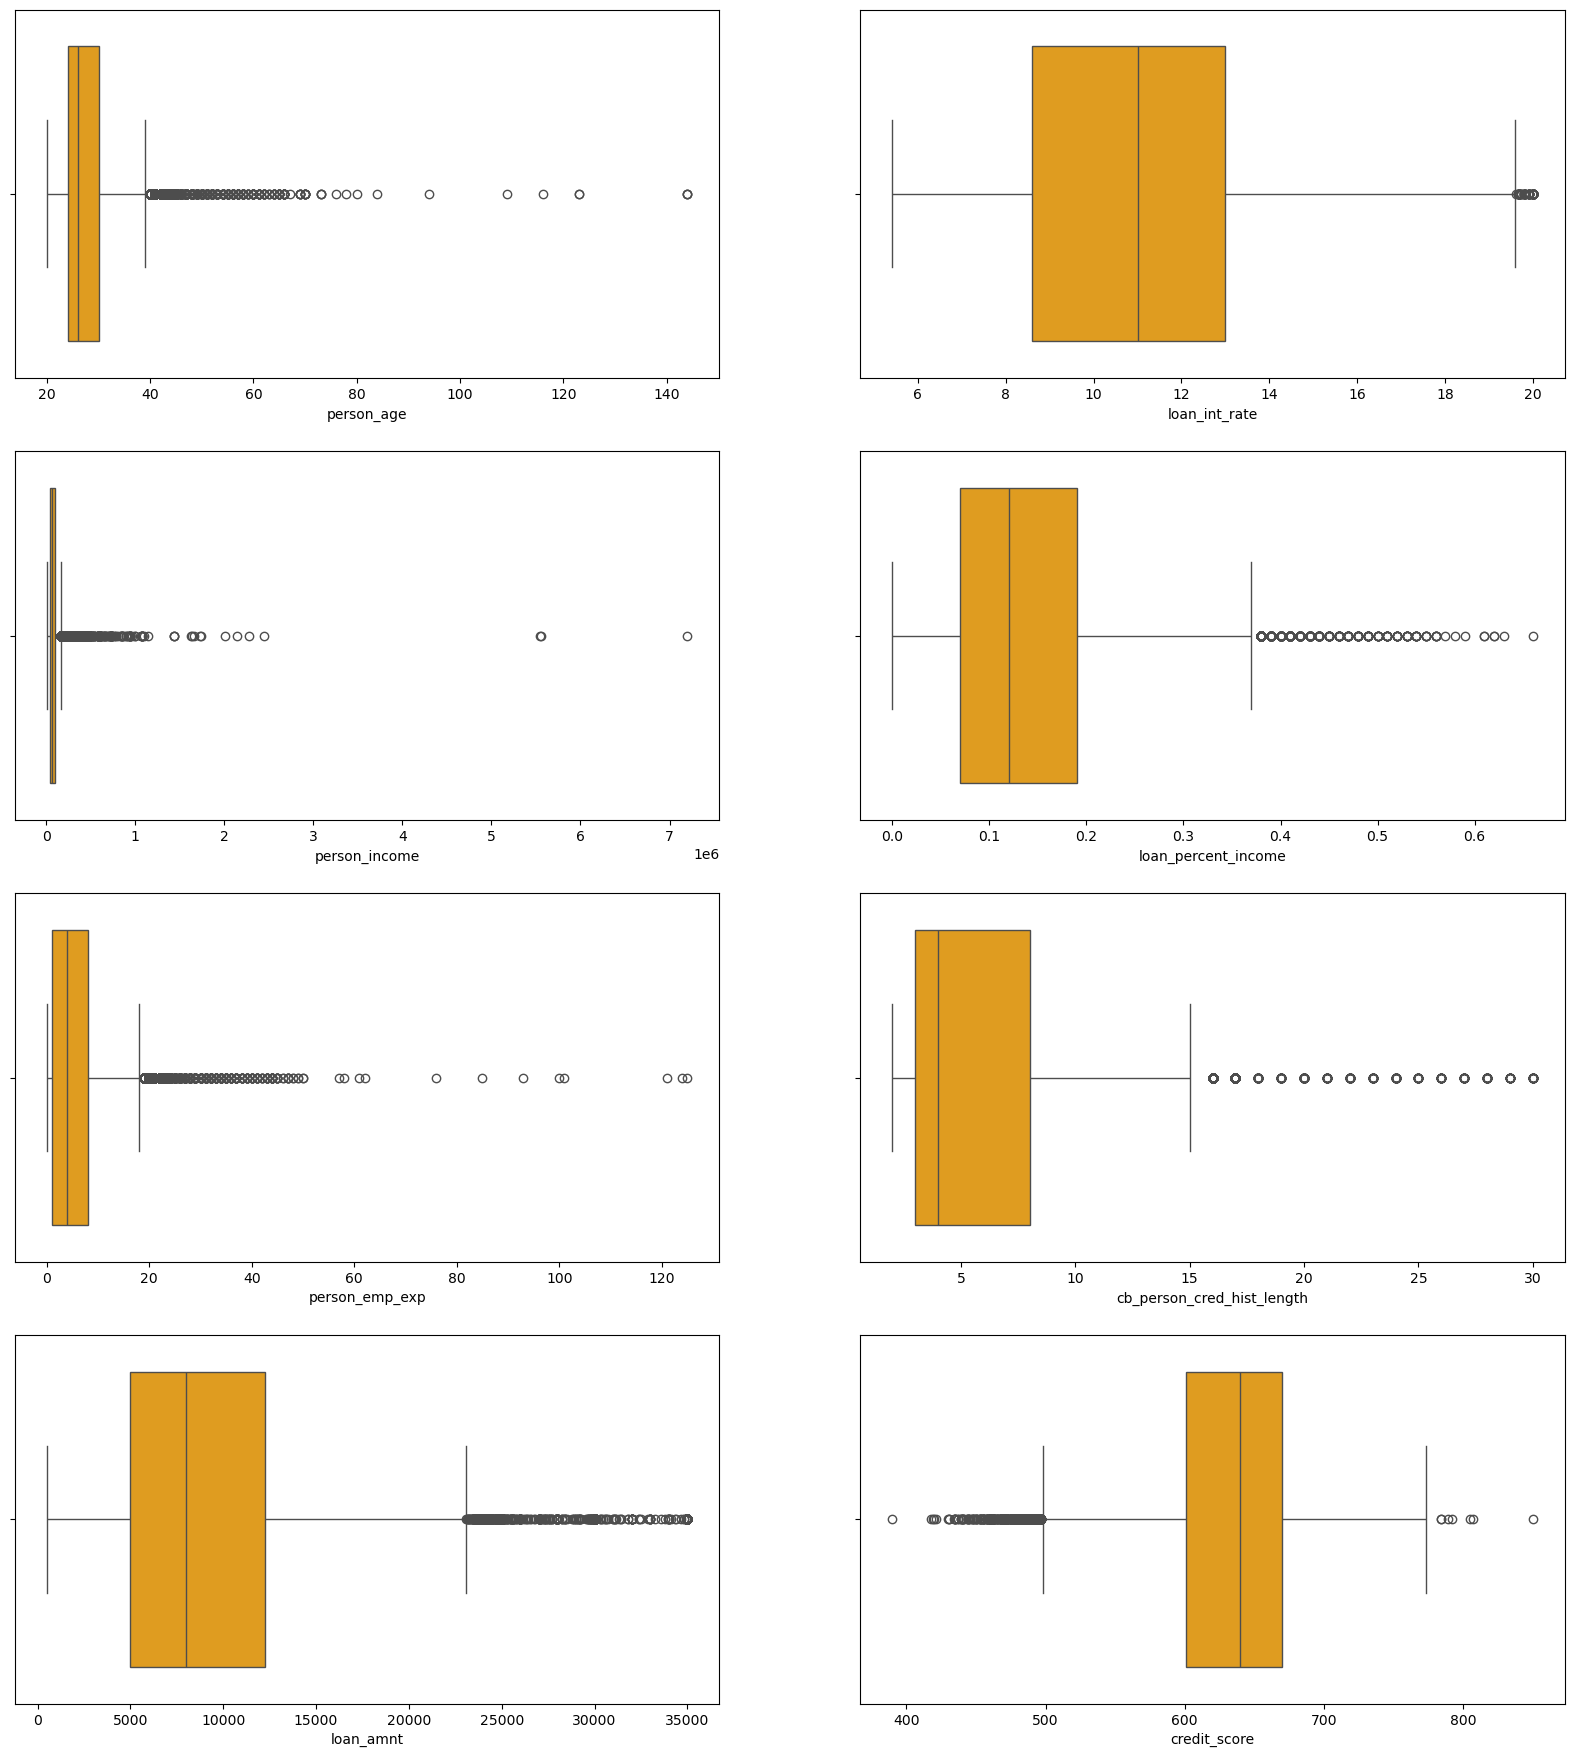

In [19]:
fig, axes = plt.subplots(figsize=(20,22), nrows = 4, ncols = 2)
for i, col in enumerate(num_col[:4]):
    column = 0
    sns.boxplot(data, x=col, ax=axes[i][column], color="orange")

for i, col in enumerate(num_col[4:]):
    column = 1
    sns.boxplot(data, x=col, ax=axes[i][column], color="orange")

fig.savefig("BoxplotBefore.png")

In [20]:
data.loc[data["person_age"]>100]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


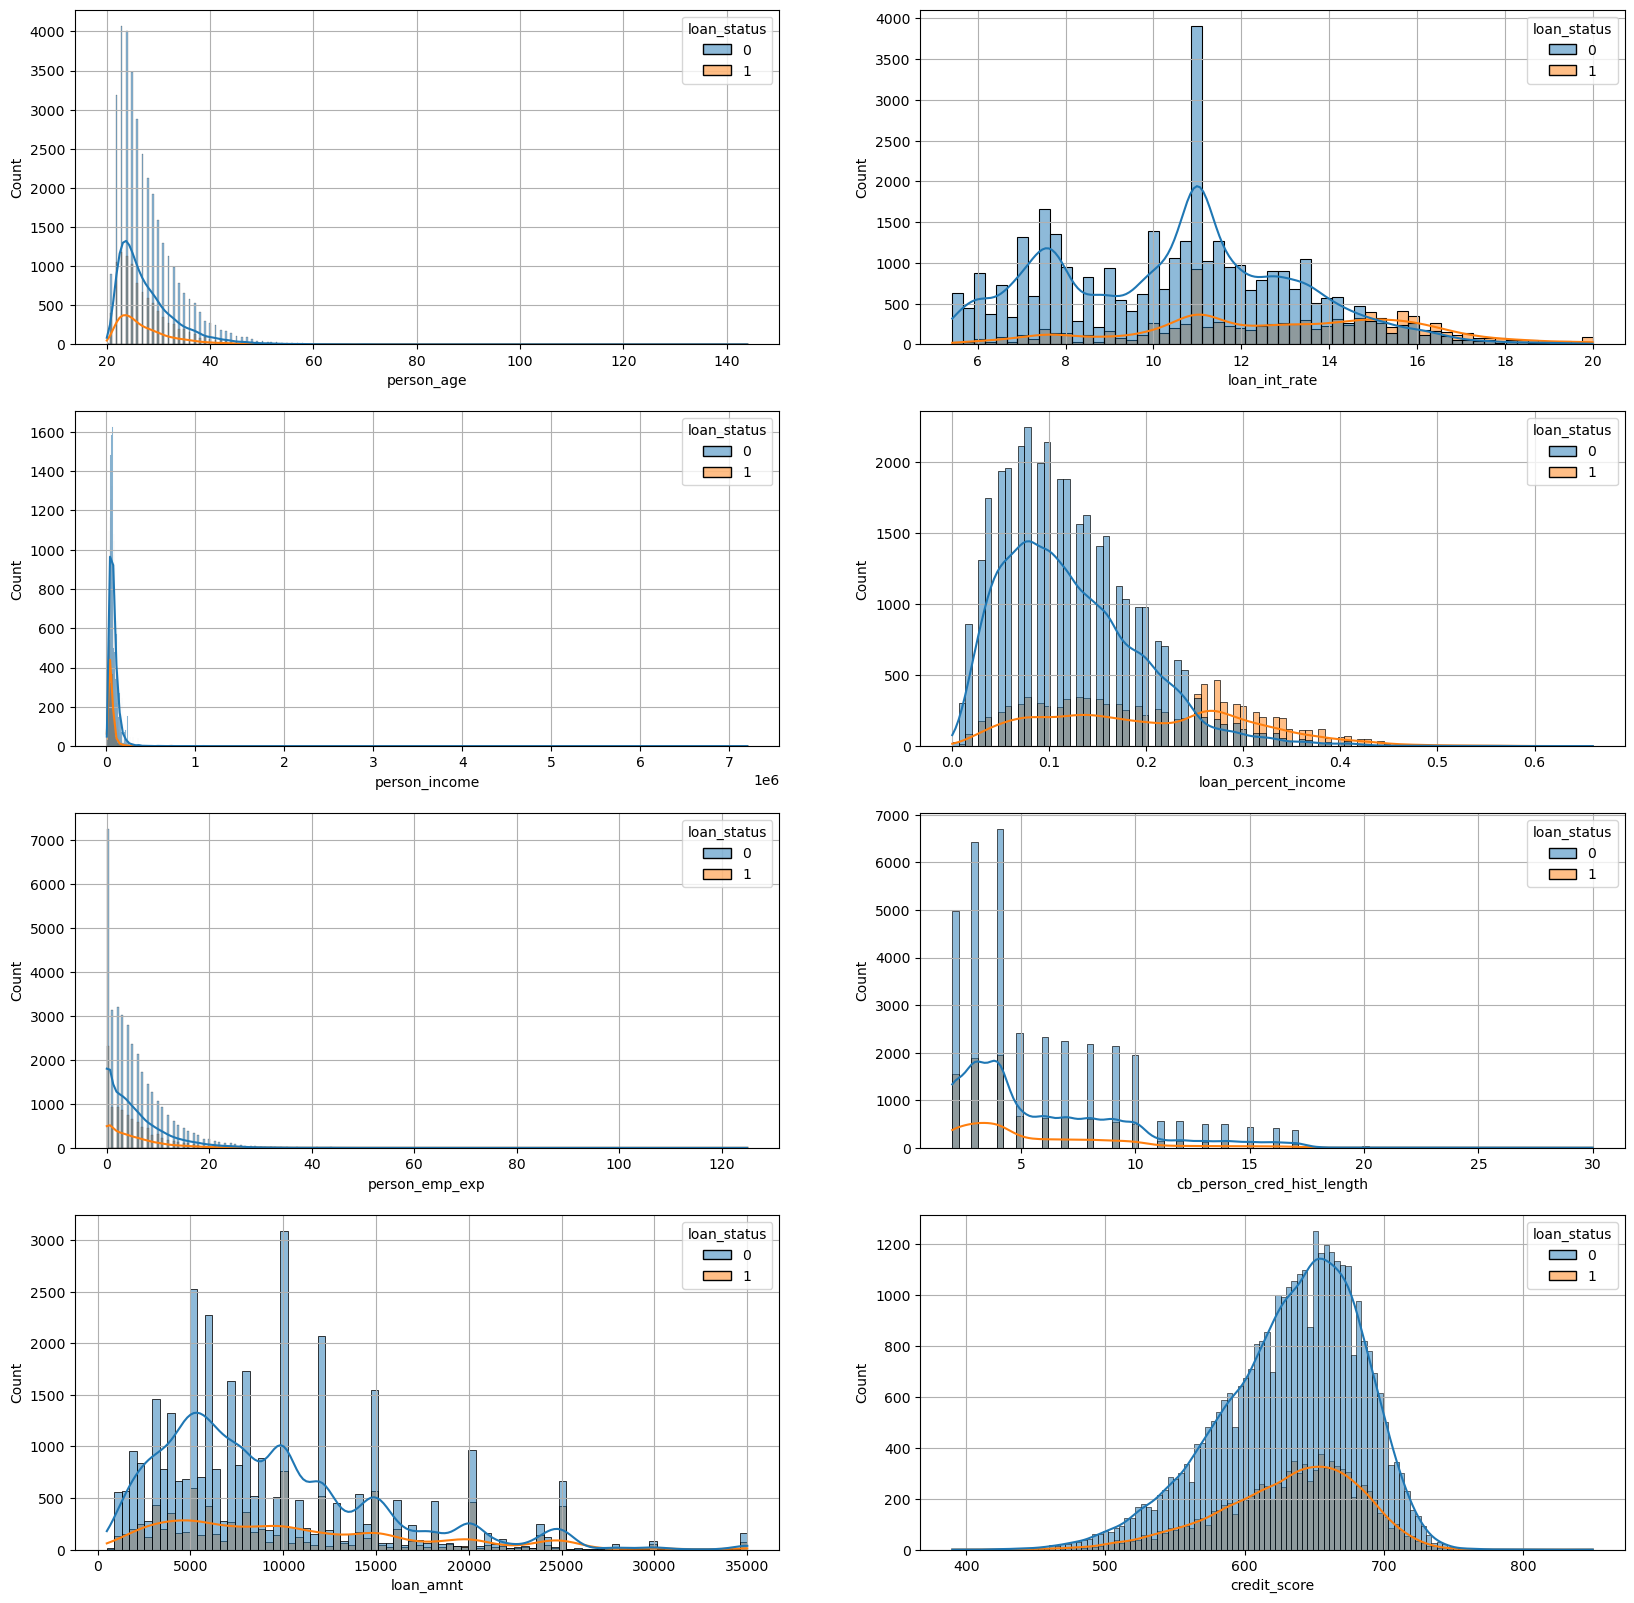

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
for i,col in enumerate(num_col[:4]):
    column = 0
    axes[i][column].grid()
    sns.histplot(data, x=col, kde=True, ax=axes[i][column], hue="loan_status")

for i,col in enumerate(num_col[4:]):
    column = 1
    axes[i][column].grid()
    sns.histplot(data, x=col, kde=True, ax=axes[i][column], hue="loan_status")

fig.savefig("Distribution_w_outliers.png")

## Handling Outliers

In [22]:
data.loc[data["person_age"]>100]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


In [23]:
data.loc[data["person_age"] > 100,"person_age"] = np.ceil(data["person_age"].mean())

In [24]:
data.loc[data["person_age"]>100]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [25]:
data.loc[data["person_income"]>5000000]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
32297,28.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.0,25.0,850,No,0
37930,28.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.0,24.0,708,No,0
38113,28.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.0,22.0,792,No,0


In [26]:
data.loc[data["person_age"]<=data["person_emp_exp"], "person_emp_exp"] = np.ceil(data["person_emp_exp"].mean())

In [27]:
data.loc[data["person_emp_exp"]>50]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
32355,78.0,male,Associate,58463.0,57,RENT,3000.0,MEDICAL,7.51,0.05,25.0,754,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80.0,male,High School,77894.0,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32506,84.0,male,High School,114705.0,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
32534,76.0,female,Bachelor,90934.0,58,RENT,15000.0,MEDICAL,8.94,0.16,25.0,737,No,0


In [28]:
data.drop(index=data[data["person_income"]>=5000000].index, inplace=True)

In [29]:
data.loc[data["person_income"]>=1000000]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
17833,32.0,female,High School,1440746.0,6,MORTGAGE,12000.0,VENTURE,7.51,0.01,8.0,613,No,0
17834,34.0,male,Bachelor,1138723.0,12,MORTGAGE,2000.0,PERSONAL,9.99,0.00,7.0,609,Yes,0
29119,36.0,male,Doctorate,1440982.0,15,OWN,10000.0,MEDICAL,6.54,0.01,11.0,682,Yes,0
29120,40.0,female,Bachelor,1440915.0,19,MORTGAGE,10000.0,MEDICAL,11.01,0.01,16.0,637,Yes,0
29121,50.0,male,High School,1081082.0,28,MORTGAGE,30000.0,DEBTCONSOLIDATION,12.69,0.03,15.0,643,No,0
29122,36.0,female,High School,1081254.0,14,MORTGAGE,6000.0,PERSONAL,11.01,0.01,12.0,600,Yes,0
29345,42.0,male,High School,1067921.0,20,RENT,20000.0,EDUCATION,11.01,0.02,17.0,529,Yes,0
30049,42.0,male,High School,2448661.0,16,RENT,8450.0,VENTURE,12.29,0.00,15.0,635,Yes,0
31921,37.0,male,Associate,1081139.0,15,MORTGAGE,25000.0,PERSONAL,12.87,0.02,13.0,625,Yes,0
31922,47.0,male,High School,1635757.0,24,MORTGAGE,6600.0,VENTURE,7.74,0.00,17.0,591,Yes,0


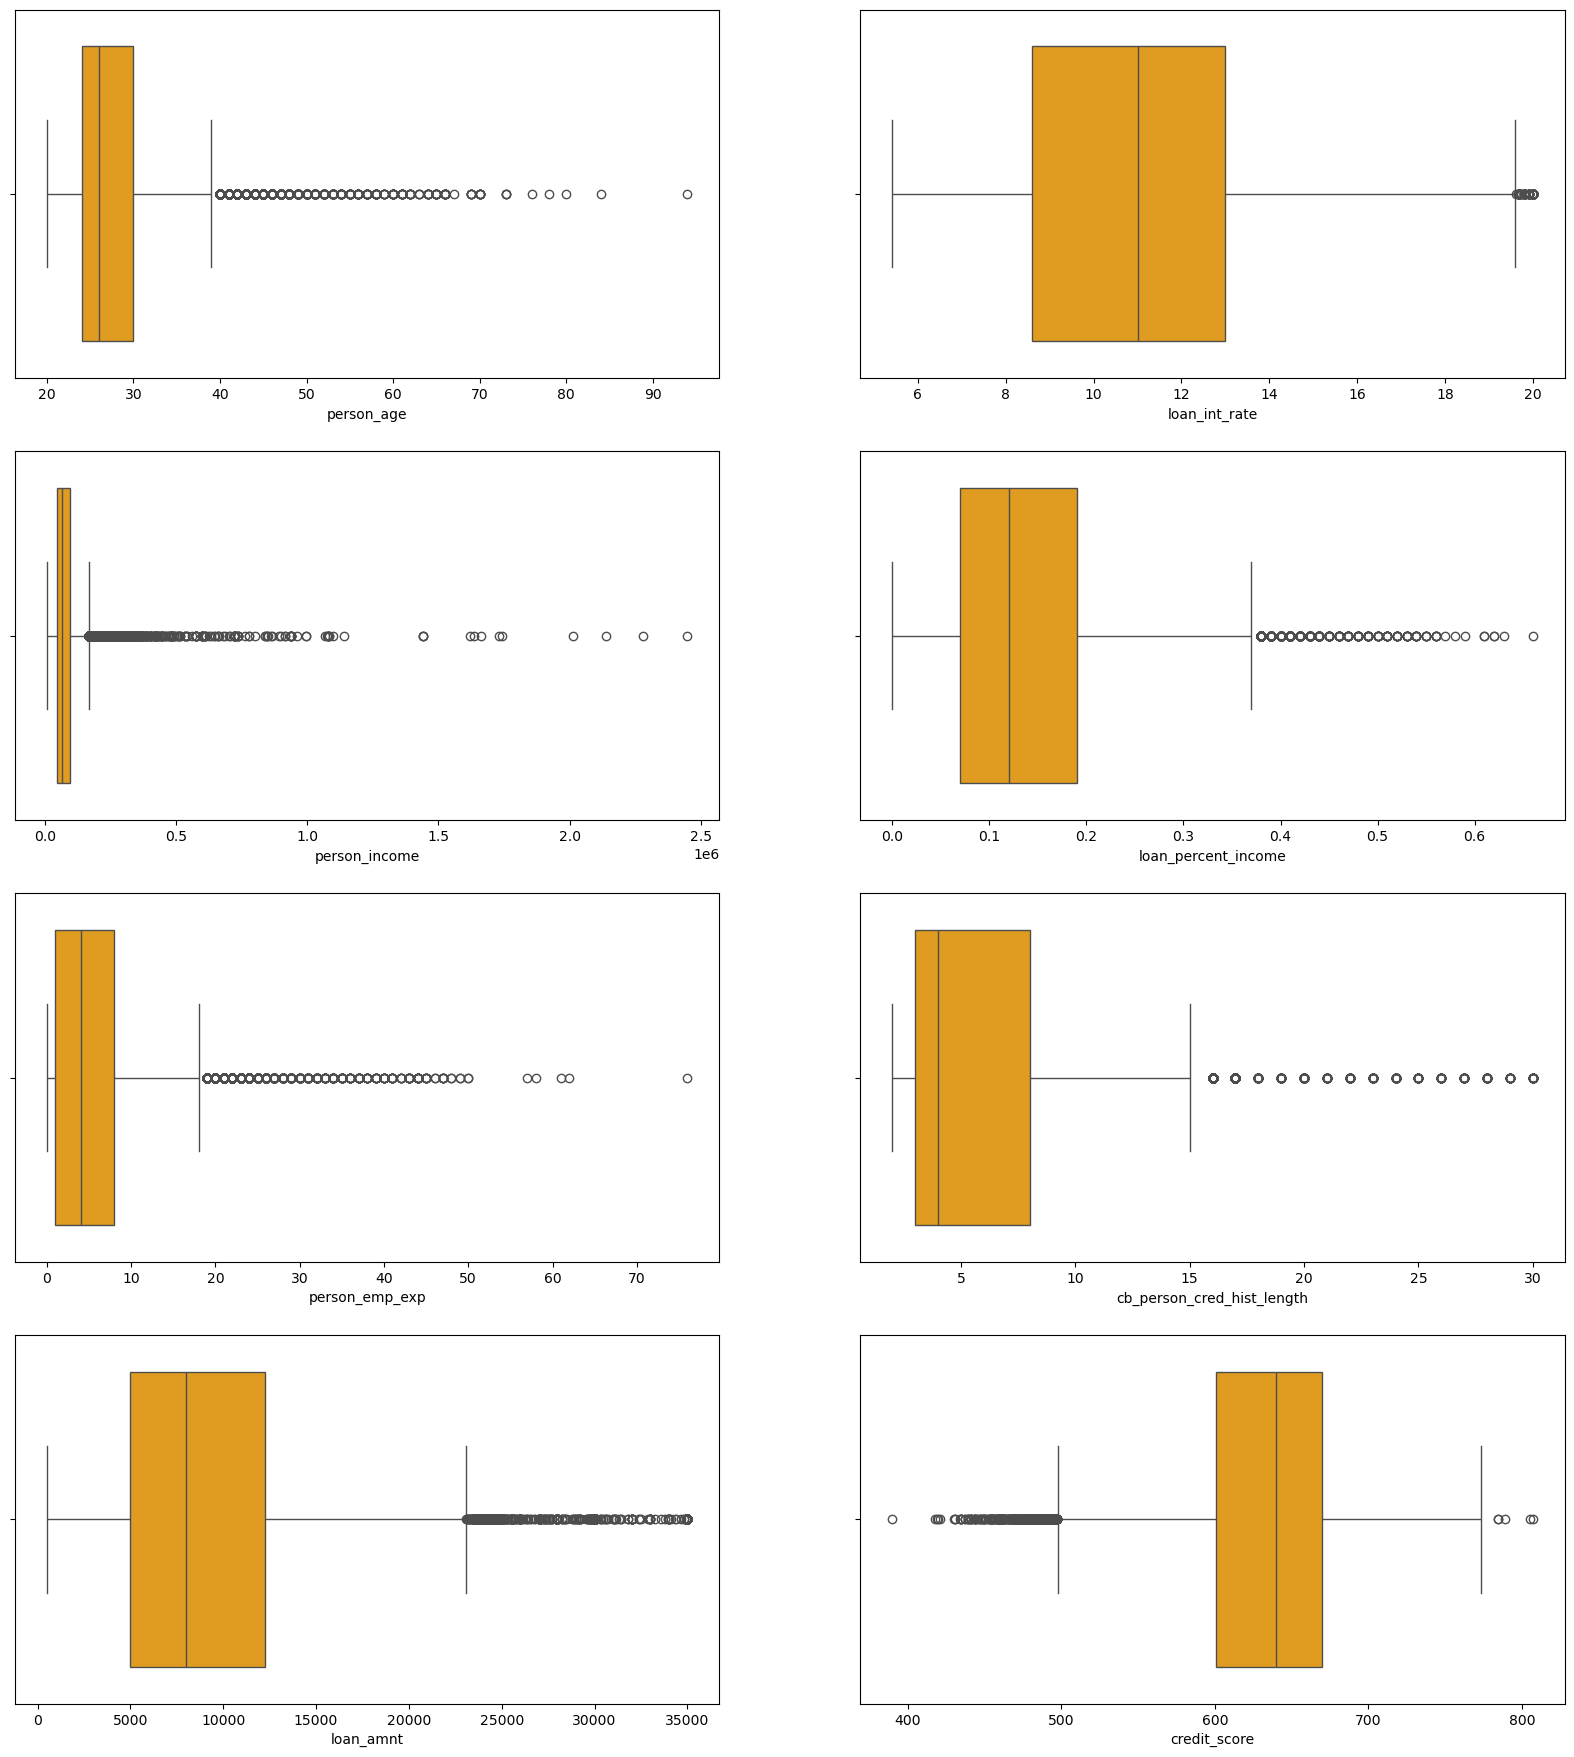

In [30]:
fig, axes = plt.subplots(figsize=(20,22), nrows = 4, ncols = 2)
for i, col in enumerate(num_col[:4]):
    column = 0
    sns.boxplot(data, x=col, ax=axes[i][column], color="orange")

for i, col in enumerate(num_col[4:]):
    column = 1
    sns.boxplot(data, x=col, ax=axes[i][column], color="orange")

fig.savefig("BoxplotAfter.png")

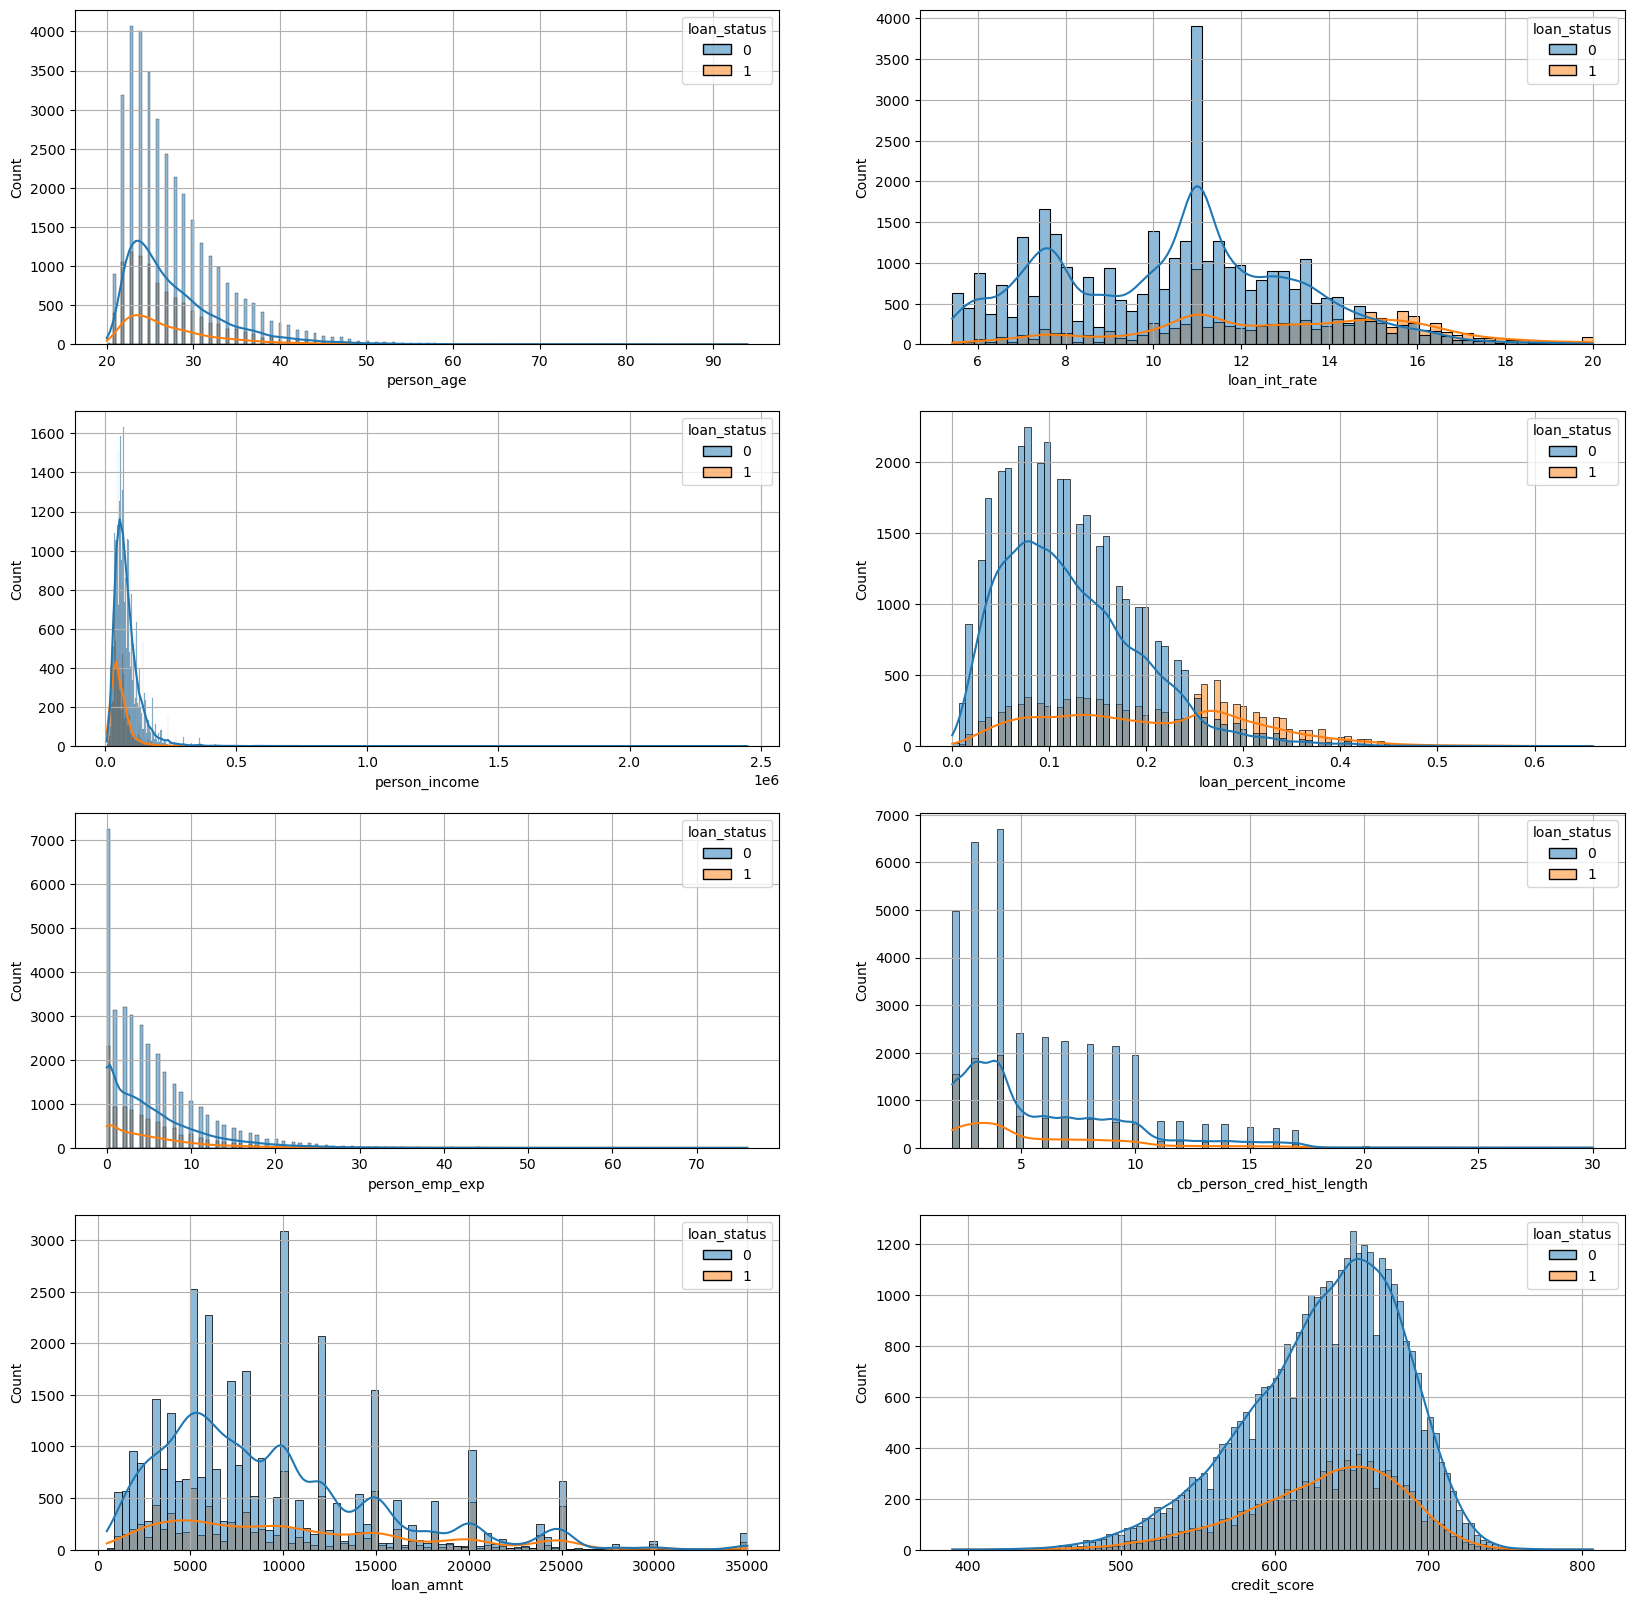

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
for i,col in enumerate(num_col[:4]):
    column = 0
    axes[i][column].grid()
    sns.histplot(data, x=col, kde=True, ax=axes[i][column], hue="loan_status")

for i,col in enumerate(num_col[4:]):
    column = 1
    axes[i][column].grid()
    sns.histplot(data, x=col, kde=True, ax=axes[i][column], hue="loan_status")

fig.savefig("Distribution_wo_outliers.png")

## Demography Analysis

In [32]:
data["person_age"].value_counts()

person_age
23.0    5254
24.0    5138
25.0    4507
22.0    4236
26.0    3659
27.0    3095
28.0    2732
29.0    2455
30.0    2021
31.0    1645
32.0    1403
21.0    1289
33.0    1240
34.0     980
35.0     847
36.0     740
37.0     666
38.0     503
39.0     389
40.0     349
41.0     303
42.0     247
43.0     215
44.0     177
45.0     135
46.0     114
47.0     112
48.0      93
49.0      59
50.0      56
51.0      46
52.0      42
53.0      35
55.0      24
54.0      24
58.0      20
56.0      20
20.0      17
57.0      17
60.0      16
61.0      12
66.0      11
65.0      10
64.0       7
62.0       7
70.0       7
59.0       6
69.0       5
63.0       3
73.0       3
78.0       1
94.0       1
80.0       1
84.0       1
76.0       1
67.0       1
Name: count, dtype: int64

In [33]:
def find_age_group(x):
    if x>=18 and x < 40:
        return "Young Adult"
    elif x>=40 and x<60:
        return "Middle-Aged Adult"
    elif x>=60:
        return "Senior Adult"
    else:
        return np.nan

In [34]:
data["age_group"] = data["person_age"].apply(find_age_group)
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,age_group
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,Young Adult
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,Young Adult
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,Young Adult
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,Young Adult
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,Young Adult
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,Young Adult
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,Young Adult
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,Young Adult


In [41]:
data["age_group"].value_counts()

age_group
Young Adult          42816
Middle-Aged Adult     2094
Senior Adult            87
Name: count, dtype: int64

<Axes: title={'center': 'Countplot of Age group'}, xlabel='age_group', ylabel='count'>

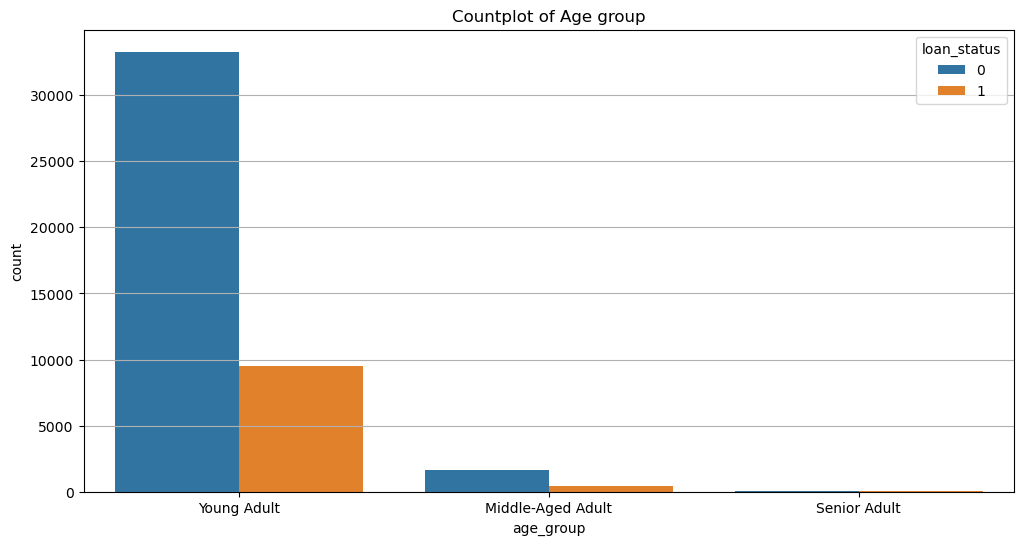

In [39]:
fig,axes = plt.subplots(figsize=(12,6))
axes.grid()
axes.set_title("Countplot of Age group")
sns.countplot(data, x="age_group", hue="loan_status")

<Axes: title={'center': 'Countplot of Age group'}, xlabel='age_group', ylabel='count'>

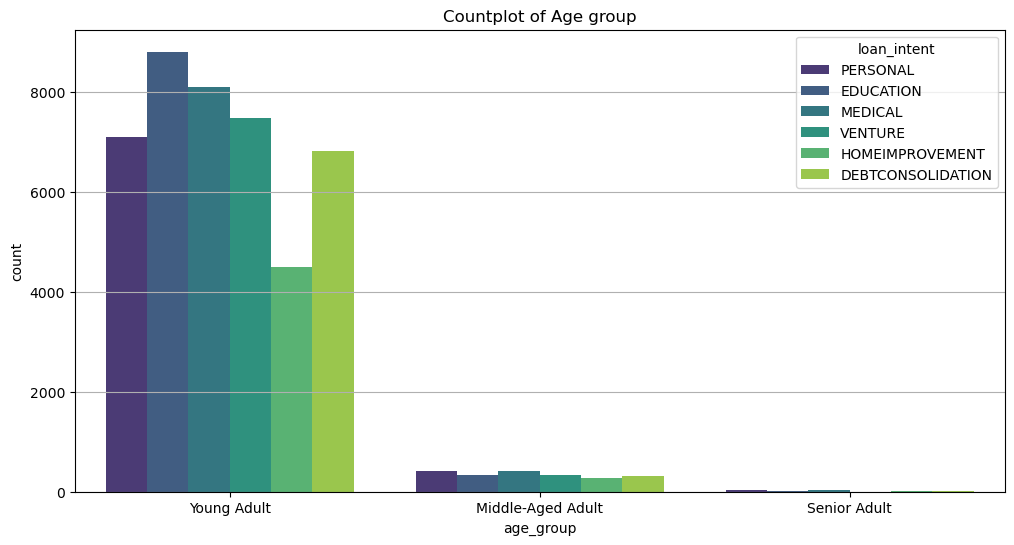

In [40]:
fig,axes = plt.subplots(figsize=(12,6))
axes.grid()
axes.set_title("Countplot of Age group")
sns.countplot(data, x="age_group", hue="loan_intent", palette="viridis")

In [38]:
age_group_approved_perc = find_percentage("age_group")
age_group_approved_perc

Young Adult          22.265041
Middle-Aged Adult    21.060172
Senior Adult         29.885057
Name: Approved Perc w.r.t age_group, dtype: float64